## Process embeddings

In [2]:
import pandas as pd
import numpy as np
import h5py
from glob import glob

In [3]:
embeddings = glob('ucyn-a_enriched/embeddings/*.csv')
dfs = [(e, pd.read_csv(e)) for e in embeddings]

In [4]:
dfs[0][0].split('/')[-1].split('.')[0]

'KC1-P2_N3_k43_Locus_28_Transcript_1_1'

In [5]:
# Write embeddings to H5 file
with h5py.File('ucyn-a_enriched/embeddings.h5', 'w') as f:
    for i, (name, df) in enumerate(dfs):
        name = name.split('/')[-1].split('.')[0] + " Cytoplasm-U new_test_set"
        f.create_dataset(name, data=df.values)

## Process Predictions

In [11]:
import pandas as pd
from Bio import SeqIO
from matplotlib import pyplot as plt

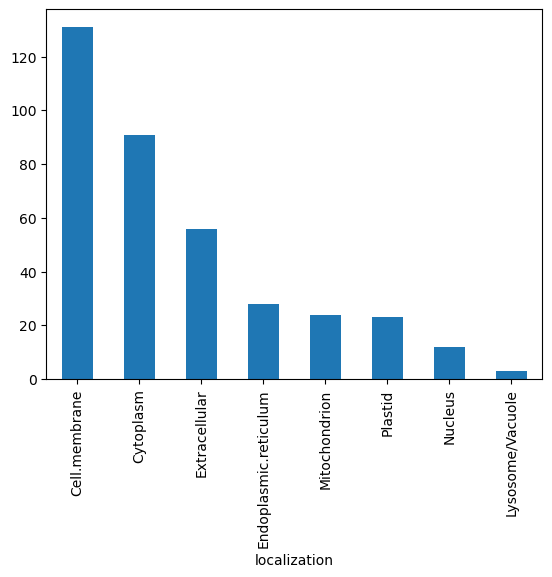

In [12]:
ids = [ seq.id for seq in SeqIO.parse('ucyn-a_enriched/ucyn-a_enriched.fasta', 'fasta') ]
df = pd.read_csv('ucyn-a_enriched/localizations.txt', header=None, names=['localization'])
df['id'] = ids

# Plot localization distribution
df['localization'].value_counts().plot(kind='bar')
plt.show()